<a href="https://colab.research.google.com/github/subodh2708/deep-learning---tensorflow-2.0/blob/main/10_time_series_forecasting_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forcasting fundamentals with tensorflow + milestone project 3: BitPredict💹💰

## Get Data 

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-10-12 11:02:49--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2022-10-12 11:02:50 (6.20 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time-series with pandas

In [ ]:
import pandas as pd

df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates = ['Date'],
                 index_col = ['Date'])

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns= {'Closing Price (USD)':'price'})
bitcoin_prices

,price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


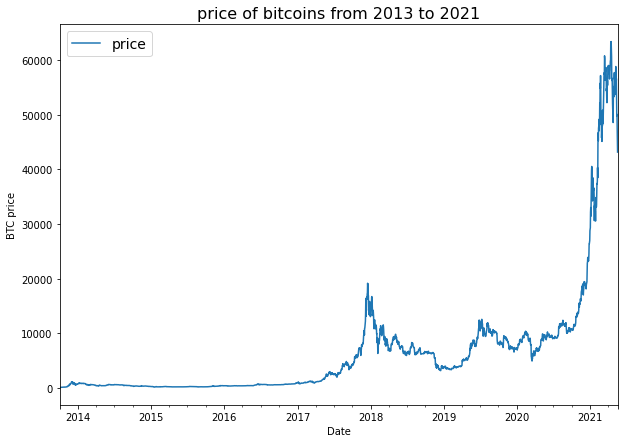

In [ ]:
import matplotlib.pyplot as plt

bitcoin_prices.plot(figsize = (10,7))
plt.ylabel('BTC price')
plt.title('price of bitcoins from 2013 to 2021', fontsize= 16)
plt.legend(fontsize= 14)


## importing time series data with python CSV module

In [ ]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter= ',')
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], '%Y-%m-%d'))
    btc_price.append(float(line[2]))

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'date')

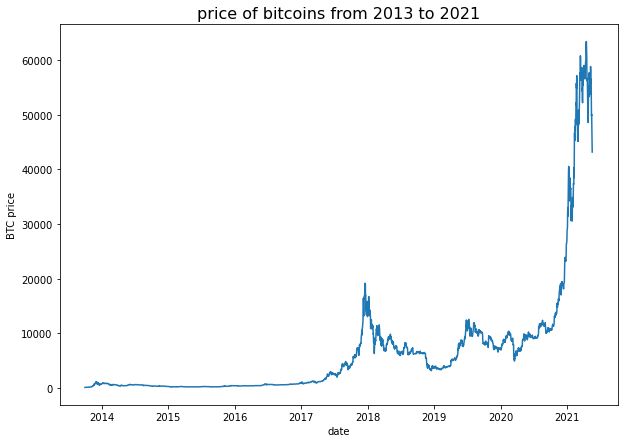

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10,7))
plt.plot(timesteps, btc_price)
plt.ylabel('BTC price')
plt.title('price of bitcoins from 2013 to 2021', fontsize= 16)
plt.xlabel('date')

## Format data part 1: create train and test set of our time series data

### creating train and test sets with time series data( the wrong way)

In [ ]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['price'].to_numpy()

timesteps[:10] , prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( timesteps, prices, test_size=0.2, random_state=42)

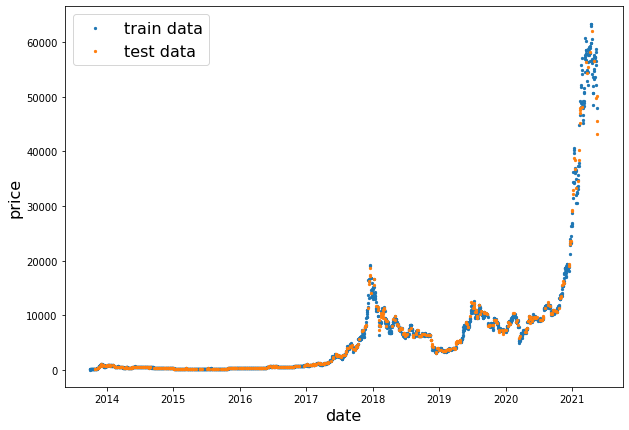

In [ ]:
plt.figure(figsize= (10,7))
plt.scatter(X_train, y_train, s= 5, label = 'train data')
plt.scatter(X_test, y_test, s= 5, label= 'test data')
plt.xlabel('date', fontsize = 16)
plt.ylabel('price', fontsize= 16)
plt.legend(fontsize=16)

## Create train and test set for time series dataset ( the right way)

In [ ]:
split_size = int(0.8 * len(prices))

X_train, y_train = timesteps[:split_size] , prices[:split_size]

X_test, y_test = timesteps[split_size:] , prices[split_size:]



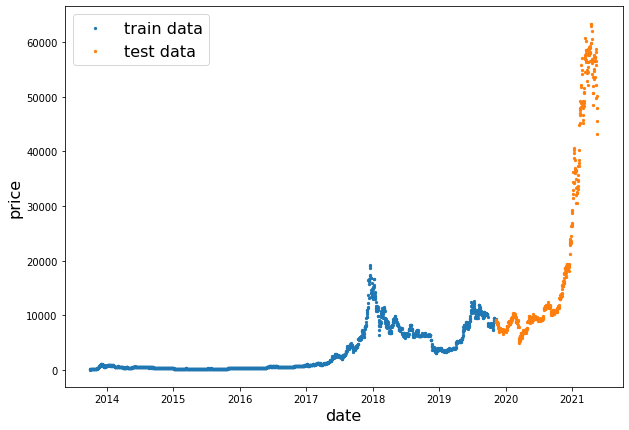

In [ ]:
plt.figure(figsize =(10,7))
plt.scatter(X_train, y_train, s= 5, label = 'train data')
plt.scatter(X_test, y_test, s= 5, label= 'test data')
plt.xlabel('date', fontsize = 16)
plt.ylabel('price', fontsize= 16)
plt.legend(fontsize=16)

## Create a ploting function

In [ ]:
def plot_time_series(timesteps, values, format = '.', start = 0 , end = None , label= None):

  plt.plot(timesteps[start:end],values[start:end], format, label = label)
  plt.xlabel('Time')
  plt.ylabel('BTC Price')
  if label:
    plt.legend(fontsize= 16)

  plt.grid(True)

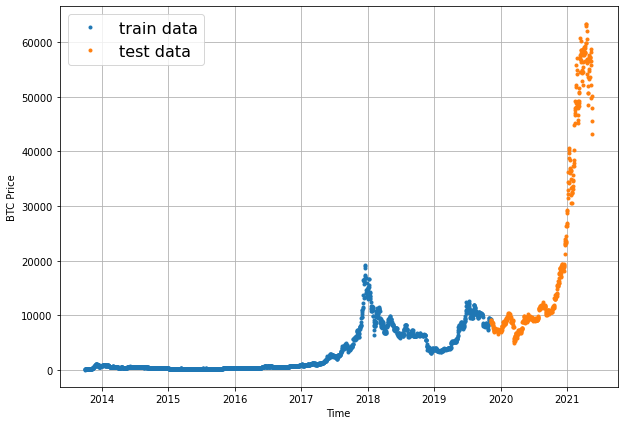

In [ ]:
plt.figure(figsize = (10,7))
plot_time_series(timesteps = X_train , values = y_train , label= 'train data')
plot_time_series(X_test, y_test , label= 'test data')

## modelling experiment

### model 0: Naive Forecast(baseline)

In [ ]:
naive_forecast = y_test[:-1]

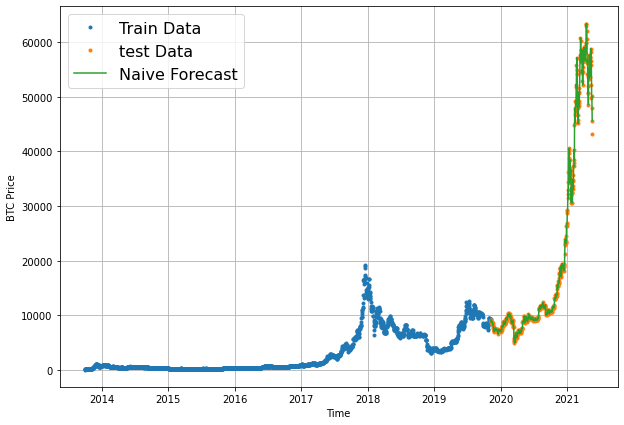

In [ ]:
plt.figure(figsize= (10,7))
plot_time_series(X_train,y_train, label= 'Train Data')
plot_time_series(X_test , y_test, label= 'test Data')
plot_time_series(timesteps = X_test[1:], values = naive_forecast, format= '-', label= 'Naive Forecast')

## Evaluating the time series model

In [ ]:
import tensorflow as tf

In [ ]:
def mean_absolute_scaled_error(y_true,y_pred):
  mae= tf.reduce_mean(tf.abs(y_true - y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae/mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_true = y_test[1:], y_pred = naive_forecast).numpy()

0.9995699939182624

In [ ]:
def evaluate_preds(y_true,y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype= tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse = tf.sqrt(mae)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase = mean_absolute_scaled_error(y_true,y_pred)

  return{'mae':mae.numpy(),
         'mse':mse.numpy(),
         'rmse':rmse.numpy(),
         'mape':mape.numpy(),
         'mase': mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true = y_test[1:],
                               y_pred= naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 23.832336,
 'mape': 2.516525,
 'mase': 0.99957}

In [ ]:
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [ ]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737222>

In [ ]:
tf.reduce_max(y_test), tf.reduce_min(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>,
 <tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>)

## Format data part 2: Windowing the dataset

In [ ]:
print(f'we want to use this {btc_price[:7]} to predict this {btc_price[7]}')

we want to use this [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this 123.033


In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
def get_labelled_windows(x, horizon=HORIZON):

  return x[:, :-horizon], x[:, -horizon:]


In [ ]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8) +1, axis=0))
print(f' window: {tf.squeeze(test_window)} -->  label: {tf.squeeze(test_label)}') 

 window: [1 2 3 4 5 6 7] -->  label: 8


In [ ]:
import numpy as np

def make_windows(x , window_size=WINDOW_SIZE, horizon = HORIZON):
  window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size + horizon - 1)),axis=0).T

  #print(f'window_indexes: \n{window_indexes, window_indexes.shape}')
  windowed_array =  x[window_indexes]

  windows,labels = get_labelled_windows(windowed_array, horizon= horizon)
  return windows,labels


In [ ]:
full_windows, full_labels = make_windows(prices, window_size= WINDOW_SIZE, horizon = HORIZON)

In [ ]:
for i in range(3):
  print(f'windows: {full_windows[i]} --> labels: {full_labels[i]}')

windows: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] --> labels: [123.033]
windows: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] --> labels: [124.049]
windows: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] --> labels: [125.96116]


## Turning windows into train and test set

In [ ]:
def make_train_test_split(windows, labels, test_split=0.2):
  split_size = int(len(windows) * (1- test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels , test_labels

In [ ]:
train_windows,test_windows,train_labels,test_labels = make_train_test_split(full_windows,full_labels)

## making a modelling checkpoint callback

In [ ]:
import os

def create_model_checkpoint(model_name, save_path = 'model_experiment'):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                            verbose = 0,
                                            save_best_only= True)

## model 1 : Dense model (window = 7, horizon = 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation= 'relu'),
    layers.Dense(HORIZON,activation = 'linear')
],name = 'model_1_dense')

model_1.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae','mse'])

model_1.fit(x =train_windows,
            y = train_labels,
            epochs = 100,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_1.name)])

Epoch 1/100
18/18 [==============================] - 4s 41ms/step - loss: 780.3595 - mae: 780.3595 - mse: 2312877.0000 - val_loss: 2278.5544 - val_mae: 2278.5544 - val_mse: 12761646.0000
Epoch 2/100
18/18 [==============================] - 0s 27ms/step - loss: 247.8195 - mae: 247.8195 - mse: 285793.8438 - val_loss: 1008.0859 - val_mae: 1008.0859 - val_mse: 3457944.7500
Epoch 3/100
18/18 [==============================] - 0s 26ms/step - loss: 190.4361 - mae: 190.4361 - mse: 174517.2812 - val_loss: 958.1794 - val_mae: 958.1794 - val_mse: 3048661.0000
Epoch 4/100
18/18 [==============================] - 0s 26ms/step - loss: 172.5639 - mae: 172.5639 - mse: 157133.8281 - val_loss: 901.7570 - val_mae: 901.7570 - val_mse: 2686797.2500
Epoch 5/100
18/18 [==============================] - 0s 27ms/step - loss: 163.4465 - mae: 163.4465 - mse: 142684.3750 - val_loss: 874.2380 - val_mae: 874.2380 - val_mse: 2537247.0000
Epoch 6/100
18/18 [==============================] - 0s 27ms/step - loss: 159.9

In [ ]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 632.0480 - mae: 632.0480 - mse: 1290380.6250


[632.0480346679688, 632.0480346679688, 1290380.625]

In [ ]:
model_1 = tf.keras.models.load_model("model_experiment/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 569.8619 - mae: 569.8619 - mse: 1179377.5000


[569.8618774414062, 569.8618774414062, 1179377.5]

## Making forecast with a model (on the test dataset )

In [ ]:
def make_preds(model, input_data):

  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
model_1_preds = make_preds(model_1, test_windows)
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8885.547, 8792.722, 9038.627, 8830.125, 8746.927, 8749.031,
       8715.138, 8529.912, 8482.934, 8538.44 ], dtype=float32)>

In [ ]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred = model_1_preds)

In [ ]:
model_1_results

{'mae': 569.8619,
 'mse': 1179377.5,
 'rmse': 23.871778,
 'mape': 2.552693,
 'mase': 1.0010895}

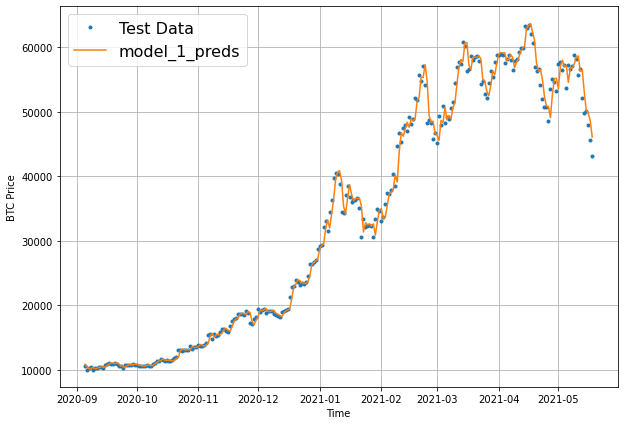

In [ ]:
offset = 300
plt.figure(figsize = (10,7))

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values = test_labels[:,0],
                 start = offset, label = "Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values = model_1_preds,
                 start = offset,
                 format = "-",
                 label = "model_1_preds")


## Model 2: Dense(window = 30, horizon = 1)

In [ ]:
HORIZON = 1
WINDOW_SIZE = 30

In [ ]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(windows = full_windows,
                                                                               labels =  full_labels,
                                                                               test_split = 0.2)

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
], name = "model_2_dense")

model_2.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            batch_size = 128,
            epochs = 100,
            verbose =0,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_2.name)])

In [ ]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 693.7279


693.7279052734375

In [ ]:
model_2 = tf.keras.models.load_model('model_experiment/model_2_dense/')
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 610.2061


610.2061157226562

In [ ]:
model_2_preds = make_preds(model_2,
                           input_data = test_windows)

In [ ]:
model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_2_preds)


In [ ]:
model_2_results

{'mae': 610.20605,
 'mse': 1287168.4,
 'rmse': 24.702349,
 'mape': 2.747798,
 'mase': 1.0666462}

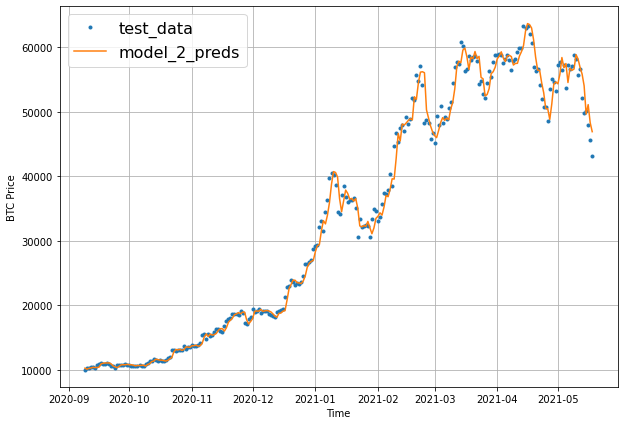

In [ ]:
offset =300

plt.figure(figsize= (10,7))

plot_time_series(timesteps= X_test[-len(test_windows):],
                 values = test_labels[:,0],
                 start = offset,
                 label = "test_data")

plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = model_2_preds,
                 start = offset,
                 format = "-",
                 label = "model_2_preds")

## model 3 : Dense(window =30, horizon = 7)

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows,full_labels = make_windows(prices, window_size= WINDOW_SIZE , horizon =  HORIZON)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(windows = full_windows,
                                                                               labels = full_labels)

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
],name = 'model_3_dense')

model_3.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size= 128,
            epochs =100,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_3.name)])


Epoch 1/100
18/18 [==============================] - 1s 29ms/step - loss: 1476.4603 - val_loss: 3079.5249
Epoch 2/100
18/18 [==============================] - 0s 25ms/step - loss: 552.5051 - val_loss: 2455.2180
Epoch 3/100
18/18 [==============================] - 0s 25ms/step - loss: 435.1978 - val_loss: 2284.0312
Epoch 4/100
18/18 [==============================] - 0s 26ms/step - loss: 391.4850 - val_loss: 1976.4583
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 357.0397 - val_loss: 1999.9276
Epoch 6/100
18/18 [==============================] - 1s 40ms/step - loss: 332.0736 - val_loss: 1706.2638
Epoch 7/100
18/18 [==============================] - 0s 25ms/step - loss: 309.2401 - val_loss: 1586.3514
Epoch 8/100
18/18 [==============================] - 0s 25ms/step - loss: 302.1331 - val_loss: 1558.7604
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 293.7004 - val_loss: 1594.4199
Epoch 10/100
18/18 [==============================] - 0s

In [ ]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1336.9637


1336.9637451171875

In [ ]:
model_3 = tf.keras.models.load_model('model_experiment/model_3_dense/')
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1230.3032


1230.30322265625

In [ ]:
model_3_preds = make_preds(model_3,
                           input_data = test_windows)

model_3_preds[:3]

<tf.Tensor: shape=(3, 7), dtype=float32, numpy=
array([[9071.629, 9120.39 , 9455.295, 9258.954, 9408.857, 9509.552,
        9432.525],
       [8797.426, 8903.432, 9267.468, 8875.394, 9007.122, 9122.638,
        9235.624],
       [8751.523, 8853.161, 9153.676, 8775.768, 8928.224, 8964.45 ,
        9128.611]], dtype=float32)>

In [ ]:
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred =  model_3_preds)

model_3_results

{'mae': array([ 529.2425  ,  329.57925 ,  326.39008 ,  374.60867 ,  431.51688 ,
         549.3732  ,  562.43054 ,  485.05893 ,  575.0695  ,  703.2308  ,
         846.11896 ,  763.4683  ,  720.9709  ,  790.6166  ,  581.79706 ,
         270.6365  ,  200.58455 ,  179.74596 ,  247.14084 ,  288.6939  ,
         126.96212 ,  163.48416 ,  162.15207 ,  244.02463 ,  156.33998 ,
         153.89098 ,  160.38072 ,  174.10303 ,  161.83545 ,  207.19545 ,
         303.6389  ,  387.51047 ,  285.77164 ,  282.76605 ,  276.2288  ,
         252.15771 ,  332.90924 ,  267.59103 ,  190.00851 ,  217.71867 ,
         359.60965 ,  130.85658 ,  129.65584 ,  104.42913 ,  102.54701 ,
          43.833496,   65.42787 ,  104.435196,  132.47559 ,  151.24832 ,
         163.83748 ,  136.13748 ,  193.77086 ,  119.961914,  244.03041 ,
         363.06793 ,  528.7798  ,  539.62805 ,  514.50946 ,  519.2809  ,
         445.49506 ,  253.65297 ,  265.8099  ,  292.9974  ,  448.08322 ,
         447.65332 ,  493.5678  ,  511.25635

## make our evaluation function work for larger horizons

In [ ]:
tf.reduce_mean(model_3_results['mae']).numpy()

1230.3032

In [ ]:
def evaluate_preds(y_true,y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype= tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse = tf.sqrt(mae)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase = mean_absolute_scaled_error(y_true,y_pred)

  if mae.ndim >0:
    mae = tf.reduce_mean(mae)
    mse =tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return{'mae':mae.numpy(),
         'mse':mse.numpy(),
         'rmse':rmse.numpy(),
         'mape':mape.numpy(),
         'mase': mase.numpy()}

In [ ]:
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_3_preds)
model_3_results

{'mae': 1230.3032,
 'mse': 5372156.0,
 'rmse': 29.595303,
 'mape': 5.525269,
 'mase': 2.1892557}

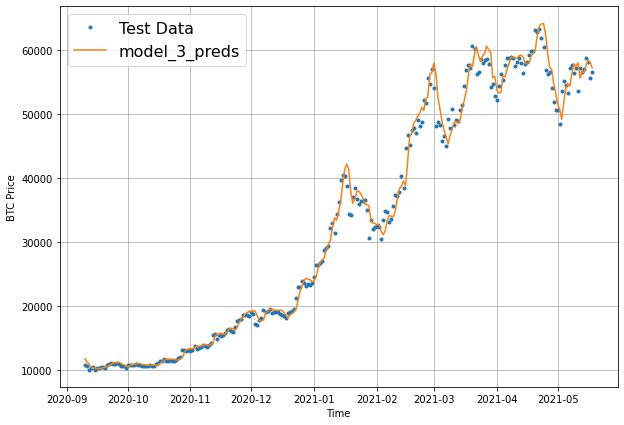

In [ ]:
offset = 300

plt.figure(figsize = (10,7))

plot_time_series(timesteps = X_test[-len(test_windows):], values = test_labels[:,0], start = offset, label = 'Test Data')

plot_time_series(timesteps =X_test[-len(test_windows):], values = tf.reduce_mean(model_3_preds, axis=1) ,start = offset,format='-', label = 'model_3_preds' )

## Which of our model performing best so far

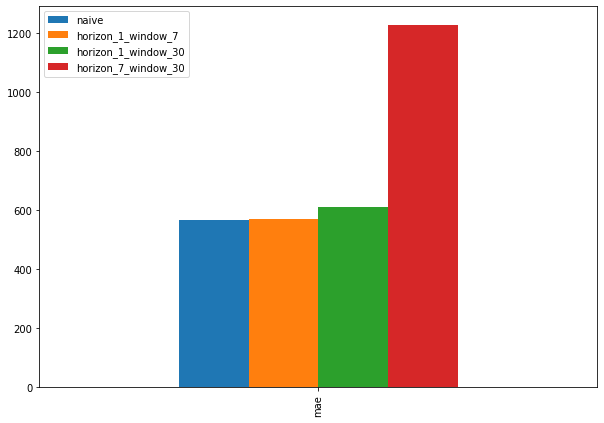

In [ ]:
pd.DataFrame({'naive':naive_results['mae'],
              'horizon_1_window_7':model_1_results['mae'],
              'horizon_1_window_30':model_2_results['mae'],
              'horizon_7_window_30': model_3_results['mae']},index = ['mae']).plot(figsize=(10,7),kind = "bar");

## model 4: Conv1D

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

full_windows,full_labels = make_windows(prices, window_size=WINDOW_SIZE,horizon=HORIZON)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)

In [ ]:
train_windows[0].shape

(7,)

In [ ]:
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer  = layers.Lambda(lambda x : tf.expand_dims(x, axis = 1))

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x : tf.expand_dims(x, axis= 1)),
    layers.Conv1D(filters = 128, kernel_size = 5, strides=1, padding= 'causal', activation = 'relu'),
    layers.Dense(HORIZON)
] , name = "model_4_conv1d")

model_4.compile(loss = "mae",
              optimizer = tf.keras.optimizers.Adam())

model_4.fit(train_windows,
          train_labels,
          batch_size = 128,
          epochs = 100,
          verbose = 1,
          validation_data = (test_windows, test_labels),
          callbacks = [create_model_checkpoint(model_name = 'model_4_conv1d') ])

Epoch 1/100
18/18 [==============================] - 7s 46ms/step - loss: 1207.3829 - val_loss: 2320.5935
Epoch 2/100
18/18 [==============================] - 1s 37ms/step - loss: 316.2178 - val_loss: 1467.2780
Epoch 3/100
18/18 [==============================] - 1s 36ms/step - loss: 192.6775 - val_loss: 1164.7836
Epoch 4/100
18/18 [==============================] - 1s 37ms/step - loss: 177.3532 - val_loss: 981.7596
Epoch 5/100
18/18 [==============================] - 1s 37ms/step - loss: 172.3293 - val_loss: 961.3766
Epoch 6/100
18/18 [==============================] - 1s 37ms/step - loss: 172.1055 - val_loss: 956.3774
Epoch 7/100
18/18 [==============================] - 1s 36ms/step - loss: 167.4865 - val_loss: 938.6174
Epoch 8/100
18/18 [==============================] - 1s 37ms/step - loss: 163.4818 - val_loss: 905.9888
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 162.8893 - val_loss: 937.0935
Epoch 10/100
18/18 [==============================] - 1s 36ms

In [ ]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 647.4928


647.4927978515625

In [ ]:
model_4 = tf.keras.models.load_model("model_experiment/model_4_conv1d/")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 570.7015


570.7014770507812

In [ ]:
model_4_preds = make_preds(model_4, test_windows)

model_4_preds[:4]

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([8892.689, 8788.859, 9031.06 , 8809.347], dtype=float32)>

In [ ]:
model_4_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_4_preds)

model_4_results

{'mae': 570.7015,
 'mse': 1179021.8,
 'rmse': 23.889359,
 'mape': 2.5686674,
 'mase': 1.0025644}

## model 5: RNN (LSTM)

In [ ]:
tf.random.set_seed(42)

inputs = layers.Input(shape = (WINDOW_SIZE))
x = layers.Lambda(lambda x : tf.expand_dims(x, axis= 1))(inputs)
#x = layers.LSTM(128, return_sequences = True)(x)
x =layers.LSTM(128, activation = 'relu')(x)
#x = layers.Dense(32, activation = 'relus')(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs= inputs, outputs = output , name = 'model_5_LSTM')

model_5.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            batch_size = 128,
            epochs = 100,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_5.name)])

Epoch 1/100
13/18 [====================>.........] - ETA: 0s - loss: 2475.4365 

18/18 [==============================] - 3s 117ms/step - loss: 2323.6104 - val_loss: 9224.1777
Epoch 2/100
14/18 [======================>.......] - ETA: 0s - loss: 817.7547 

18/18 [==============================] - 2s 103ms/step - loss: 695.4783 - val_loss: 1485.4995
Epoch 3/100
14/18 [======================>.......] - ETA: 0s - loss: 250.3801

18/18 [==============================] - 2s 121ms/step - loss: 236.8358 - val_loss: 1298.9113
Epoch 4/100
14/18 [======================>.......] - ETA: 0s - loss: 186.1960

18/18 [==============================] - 2s 106ms/step - loss: 181.9174 - val_loss: 966.6381
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 173.4030 - val_loss: 970.9545
Epoch 6/100
14/18 [======================>.......] - ETA: 0s - loss: 172.2825

18/18 [==============================] - 2s 104ms/step - loss: 172.0258 - val_loss: 941.1478
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 171.4068 - val_loss: 1006.9772
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 167.9148 - val_loss: 1003.7680
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 164.5378 - val_loss: 976.0353
Epoch 10/100
14/18 [======================>.......] - ETA: 0s - loss: 163.3403

18/18 [==============================] - 2s 103ms/step - loss: 167.4373 - val_loss: 939.6114
Epoch 11/100
14/18 [======================>.......] - ETA: 0s - loss: 168.3965

18/18 [==============================] - 2s 126ms/step - loss: 166.2714 - val_loss: 922.3736
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 165.9471 - val_loss: 923.5065
Epoch 13/100
14/18 [======================>.......] - ETA: 0s - loss: 162.3172

18/18 [==============================] - 2s 105ms/step - loss: 162.8718 - val_loss: 914.4467
Epoch 14/100
18/18 [==============================] - 0s 5ms/step - loss: 161.4185 - val_loss: 948.9937
Epoch 15/100
15/18 [========================>.....] - ETA: 0s - loss: 159.9273

18/18 [==============================] - 2s 103ms/step - loss: 156.1795 - val_loss: 842.8246
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 149.0889 - val_loss: 881.9863
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 157.2480 - val_loss: 947.0263
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 156.9499 - val_loss: 938.5565
Epoch 19/100
18/18 [==============================] - 0s 6ms/step - loss: 154.5267 - val_loss: 928.7780
Epoch 20/100
18/18 [==============================] - 0s 5ms/step - loss: 154.0974 - val_loss: 856.2919
Epoch 21/100
18/18 [==============================] - 0s 5ms/step - loss: 151.1969 - val_loss: 851.3145
Epoch 22/100
18/18 [==============================] - 0s 6ms/step - loss: 149.5891 - val_loss: 845.5214
Epoch 23/100
18/18 [==============================] - 0s 6ms/step - loss: 148.9411 - val_loss: 877.4429
Epoch 24/100
15/18 [========================>.....] - ETA: 0s - loss: 146.0

18/18 [==============================] - 2s 102ms/step - loss: 146.7430 - val_loss: 836.8419
Epoch 25/100
14/18 [======================>.......] - ETA: 0s - loss: 148.9332

18/18 [==============================] - 2s 125ms/step - loss: 145.0596 - val_loss: 820.2283
Epoch 26/100
13/18 [====================>.........] - ETA: 0s - loss: 142.1689

18/18 [==============================] - 2s 105ms/step - loss: 144.4287 - val_loss: 812.4534
Epoch 27/100
15/18 [========================>.....] - ETA: 0s - loss: 142.4940

18/18 [==============================] - 2s 103ms/step - loss: 142.3939 - val_loss: 806.6270
Epoch 28/100
14/18 [======================>.......] - ETA: 0s - loss: 137.9832

18/18 [==============================] - 2s 103ms/step - loss: 141.3812 - val_loss: 782.7975
Epoch 29/100
18/18 [==============================] - 0s 6ms/step - loss: 140.0498 - val_loss: 790.0408
Epoch 30/100
18/18 [==============================] - 0s 6ms/step - loss: 141.4674 - val_loss: 790.2127
Epoch 31/100
14/18 [======================>.......] - ETA: 0s - loss: 137.3194

18/18 [==============================] - 2s 128ms/step - loss: 137.2920 - val_loss: 762.6215
Epoch 32/100
14/18 [======================>.......] - ETA: 0s - loss: 136.9885

18/18 [==============================] - 2s 103ms/step - loss: 135.4229 - val_loss: 759.5468
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 136.0428 - val_loss: 794.5713
Epoch 34/100
14/18 [======================>.......] - ETA: 0s - loss: 139.4719

18/18 [==============================] - 2s 103ms/step - loss: 135.4828 - val_loss: 741.3134
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 132.9229 - val_loss: 757.9262
Epoch 36/100
15/18 [========================>.....] - ETA: 0s - loss: 131.7369

18/18 [==============================] - 2s 103ms/step - loss: 133.6736 - val_loss: 737.1528
Epoch 37/100
18/18 [==============================] - 0s 6ms/step - loss: 131.0723 - val_loss: 745.2133
Epoch 38/100
13/18 [====================>.........] - ETA: 0s - loss: 133.6945

18/18 [==============================] - 2s 126ms/step - loss: 129.4243 - val_loss: 714.7621
Epoch 39/100
14/18 [======================>.......] - ETA: 0s - loss: 131.2263

18/18 [==============================] - 2s 106ms/step - loss: 128.8737 - val_loss: 713.8015
Epoch 40/100
18/18 [==============================] - 0s 6ms/step - loss: 130.3353 - val_loss: 721.7138
Epoch 41/100
14/18 [======================>.......] - ETA: 0s - loss: 130.1643

18/18 [==============================] - 2s 104ms/step - loss: 126.9296 - val_loss: 699.4290
Epoch 42/100
14/18 [======================>.......] - ETA: 0s - loss: 124.0665

18/18 [==============================] - 2s 104ms/step - loss: 125.6758 - val_loss: 696.4777
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 125.6589 - val_loss: 698.1380
Epoch 44/100
14/18 [======================>.......] - ETA: 0s - loss: 121.2794

18/18 [==============================] - 2s 125ms/step - loss: 124.7013 - val_loss: 688.2337
Epoch 45/100
14/18 [======================>.......] - ETA: 0s - loss: 118.5187

18/18 [==============================] - 2s 105ms/step - loss: 122.9574 - val_loss: 679.9857
Epoch 46/100
14/18 [======================>.......] - ETA: 0s - loss: 127.2068

18/18 [==============================] - 2s 104ms/step - loss: 124.2761 - val_loss: 677.8345
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 122.6906 - val_loss: 682.8414
Epoch 48/100
14/18 [======================>.......] - ETA: 0s - loss: 121.1671

18/18 [==============================] - 2s 123ms/step - loss: 122.7093 - val_loss: 672.2595
Epoch 49/100
18/18 [==============================] - 0s 6ms/step - loss: 122.3799 - val_loss: 693.5277
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 124.3744 - val_loss: 711.4791
Epoch 51/100
18/18 [==============================] - 0s 6ms/step - loss: 124.8645 - val_loss: 770.3301
Epoch 52/100
15/18 [========================>.....] - ETA: 0s - loss: 128.1073

18/18 [==============================] - 2s 105ms/step - loss: 123.4756 - val_loss: 658.9048
Epoch 53/100
14/18 [======================>.......] - ETA: 0s - loss: 119.8059

18/18 [==============================] - 2s 105ms/step - loss: 119.6016 - val_loss: 655.7375
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 119.5427 - val_loss: 656.5200
Epoch 55/100
14/18 [======================>.......] - ETA: 0s - loss: 123.0206

18/18 [==============================] - 2s 106ms/step - loss: 118.7503 - val_loss: 648.6985
Epoch 56/100
14/18 [======================>.......] - ETA: 0s - loss: 122.1099

18/18 [==============================] - 2s 129ms/step - loss: 120.4571 - val_loss: 646.0383
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 122.5122 - val_loss: 677.0461
Epoch 58/100
14/18 [======================>.......] - ETA: 0s - loss: 117.8941

18/18 [==============================] - 2s 105ms/step - loss: 118.4892 - val_loss: 640.3754
Epoch 59/100
18/18 [==============================] - 0s 6ms/step - loss: 117.9486 - val_loss: 643.5391
Epoch 60/100
18/18 [==============================] - 0s 6ms/step - loss: 118.4331 - val_loss: 640.6182
Epoch 61/100
18/18 [==============================] - 0s 6ms/step - loss: 118.7516 - val_loss: 699.2915
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 123.1845 - val_loss: 768.8406
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 123.1763 - val_loss: 654.3424
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 116.9420 - val_loss: 681.5840
Epoch 65/100
14/18 [======================>.......] - ETA: 0s - loss: 121.1018

18/18 [==============================] - 2s 105ms/step - loss: 120.1313 - val_loss: 635.7820
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 117.4577 - val_loss: 643.5729
Epoch 67/100
14/18 [======================>.......] - ETA: 0s - loss: 119.7132

18/18 [==============================] - 2s 105ms/step - loss: 117.5885 - val_loss: 628.1508
Epoch 68/100
18/18 [==============================] - 0s 6ms/step - loss: 115.8618 - val_loss: 634.8654
Epoch 69/100
18/18 [==============================] - 0s 6ms/step - loss: 121.3316 - val_loss: 629.2919
Epoch 70/100
14/18 [======================>.......] - ETA: 0s - loss: 114.3283

18/18 [==============================] - 2s 128ms/step - loss: 114.5527 - val_loss: 621.3127
Epoch 71/100
18/18 [==============================] - 0s 6ms/step - loss: 115.1985 - val_loss: 656.6477
Epoch 72/100
18/18 [==============================] - 0s 5ms/step - loss: 119.7150 - val_loss: 630.6240
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 115.4738 - val_loss: 625.5724
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 115.4453 - val_loss: 632.7748
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 115.9593 - val_loss: 645.6693
Epoch 76/100
14/18 [======================>.......] - ETA: 0s - loss: 116.4604

18/18 [==============================] - 2s 106ms/step - loss: 115.2382 - val_loss: 613.2631
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 114.3011 - val_loss: 663.7343
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 116.6879 - val_loss: 660.9984
Epoch 79/100
14/18 [======================>.......] - ETA: 0s - loss: 111.4874

18/18 [==============================] - 2s 103ms/step - loss: 114.8646 - val_loss: 611.9203
Epoch 80/100
18/18 [==============================] - 0s 6ms/step - loss: 112.9754 - val_loss: 616.6371
Epoch 81/100
18/18 [==============================] - 0s 6ms/step - loss: 113.6728 - val_loss: 639.0808
Epoch 82/100
18/18 [==============================] - 0s 6ms/step - loss: 116.3939 - val_loss: 615.3702
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 113.1179 - val_loss: 628.7711
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 115.0442 - val_loss: 631.3227
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 115.5915 - val_loss: 618.5542
Epoch 86/100
14/18 [======================>.......] - ETA: 0s - loss: 110.5906

18/18 [==============================] - 2s 104ms/step - loss: 115.5815 - val_loss: 608.0814
Epoch 87/100
13/18 [====================>.........] - ETA: 0s - loss: 116.1265

18/18 [==============================] - 2s 128ms/step - loss: 112.1169 - val_loss: 606.6104
Epoch 88/100
14/18 [======================>.......] - ETA: 0s - loss: 116.6031

18/18 [==============================] - 2s 104ms/step - loss: 112.1954 - val_loss: 602.7028
Epoch 89/100
18/18 [==============================] - 0s 6ms/step - loss: 112.7533 - val_loss: 635.7825
Epoch 90/100
18/18 [==============================] - 0s 6ms/step - loss: 117.6940 - val_loss: 642.0150
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 116.1452 - val_loss: 640.6638
Epoch 92/100
18/18 [==============================] - 0s 6ms/step - loss: 113.1908 - val_loss: 610.3962
Epoch 93/100
14/18 [======================>.......] - ETA: 0s - loss: 114.9253

18/18 [==============================] - 2s 106ms/step - loss: 113.0806 - val_loss: 599.6537
Epoch 94/100
18/18 [==============================] - 0s 6ms/step - loss: 111.3159 - val_loss: 605.7885
Epoch 95/100
14/18 [======================>.......] - ETA: 0s - loss: 112.5732

18/18 [==============================] - 2s 104ms/step - loss: 111.2868 - val_loss: 597.7997
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 112.6389 - val_loss: 606.7860
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 111.8410 - val_loss: 630.2786
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 112.2863 - val_loss: 601.5844
Epoch 99/100
14/18 [======================>.......] - ETA: 0s - loss: 108.4805

18/18 [==============================] - 2s 127ms/step - loss: 110.9229 - val_loss: 596.4247
Epoch 100/100
13/18 [====================>.........] - ETA: 0s - loss: 117.7600

18/18 [==============================] - 2s 104ms/step - loss: 112.0055 - val_loss: 595.6136


In [ ]:
model_5 = tf.keras.models.load_model('model_experiment/model_5_LSTM')
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 595.6242


595.6242065429688

In [ ]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8981.09 , 8813.142, 8998.519, 8837.001, 8731.89 ], dtype=float32)>

In [ ]:
model_5_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_5_preds)

model_5_results

{'mae': 595.62427,
 'mse': 1270350.2,
 'rmse': 24.405415,
 'mape': 2.6765566,
 'mase': 1.0463469}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 23.832336,
 'mape': 2.516525,
 'mase': 0.99957}

## Make a multi-variate time series Dataset

In [ ]:
bitcoin_prices.head()

,price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
block_reward_1 = 50
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25


block_reward_2_datetime = np.datetime64("2012-11-08")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [ ]:
block_reward_3_datetime

numpy.datetime64('2016-07-09')

In [ ]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days

block_reward_2_days, block_reward_3_days

(1012, 2421)

In [ ]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_reward'] = None

In [ ]:
bitcoin_prices_block.iloc[:block_reward_2_days,-1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days,-1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:,-1] = block_reward_4

In [ ]:
bitcoin_prices_block.tail()

,price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


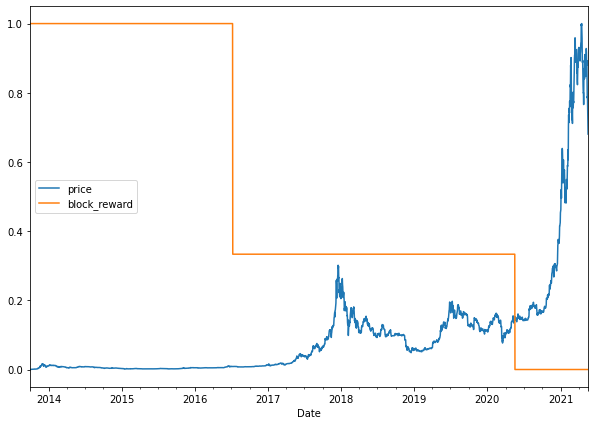

In [ ]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[['price','block_reward']]),
                                     columns = bitcoin_prices_block.columns,
                                     index = bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(10,7))

## Making a windowed dataset with pandas

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
 bitcoin_prices_windowed = bitcoin_prices_block.copy()

In [ ]:
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f'Price+{i +1}'] = bitcoin_prices_windowed['price'].shift(periods=i+1)

In [ ]:
bitcoin_prices_windowed.head()

,price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
X = bitcoin_prices_windowed.dropna().drop('price', axis = 1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['price'].astype(np.float32)

In [ ]:
split_size = int(len(X) * 0.8)
X_train,y_train = X[:split_size], y[:split_size]
X_test,y_test = X[split_size:] , y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6: Dense(multivariate Time Series)

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, 'relu'),
    tf.keras.layers.Dense(HORIZON)
], name = "model_6_dense_multivariate")

model_6.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())

model_6.fit(X_train,y_train,
            batch_size =128,
            epochs = 100,
            validation_data = (X_test,y_test),
            callbacks = [create_model_checkpoint(model_name = model_6.name)])

Epoch 1/100
18/18 [==============================] - 1s 30ms/step - loss: 1234.6854 - val_loss: 2061.9673
Epoch 2/100
18/18 [==============================] - 0s 26ms/step - loss: 351.5058 - val_loss: 1908.8840
Epoch 3/100
18/18 [==============================] - 0s 25ms/step - loss: 235.4065 - val_loss: 1329.7073
Epoch 4/100
18/18 [==============================] - 0s 25ms/step - loss: 208.6667 - val_loss: 1101.7705
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 196.5585 - val_loss: 1108.5177
Epoch 6/100
18/18 [==============================] - 0s 25ms/step - loss: 187.2311 - val_loss: 1036.1271
Epoch 7/100
18/18 [==============================] - 1s 44ms/step - loss: 182.0178 - val_loss: 1019.2624
Epoch 8/100
18/18 [==============================] - 0s 25ms/step - loss: 175.7079 - val_loss: 977.9665
Epoch 9/100
18/18 [==============================] - 0s 25ms/step - loss: 170.1808 - val_loss: 954.5330
Epoch 10/100
18/18 [==============================] - 0s 

In [ ]:
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 629.0930


629.093017578125

In [ ]:
model_6 = tf.keras.models.load_model('model_experiment/model_6_dense_multivariate/')
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 568.5405


568.54052734375

In [ ]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8848.204, 8772.87 , 9042.578, 8763.246, 8731.043, 8777.372,
       8668.652, 8508.057, 8476.813, 8526.484], dtype=float32)>

In [ ]:
model_6_results = evaluate_preds(y_true = y_test,
                                 y_pred = model_6_preds)

model_6_results

{'mae': 568.5405,
 'mse': 1170115.5,
 'rmse': 23.844088,
 'mape': 2.5486746,
 'mase': 0.9987682}

In [ ]:
model_1_results

{'mae': 569.8619,
 'mse': 1179377.5,
 'rmse': 23.871778,
 'mape': 2.552693,
 'mase': 1.0010895}

## model 7 : N-BEATS algorithm

### Building and testing the N-BEATS block layer

In [ ]:
# Create NBeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, 
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and the forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [ ]:
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.07900323  0.32552955 -0.8428994  -0.69364864 -0.31739652 -0.569761
 -0.6396348 ]
Forecast: 1.0074139833450317


### Preparing the data of N-BEATS algorithm using `tf.data`

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7 

In [ ]:
bitcoin_prices.head()

,price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("price", axis=1)
y = bitcoin_prices_nbeats.dropna()["price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
# Time to make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

## setting up  hyperparameters for N_BEATS algorithm

In [ ]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4 
N_STACKS = 30 

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connection

In [ ]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


## Building, compiling and fitting the N-BEATS algorithm

In [ ]:
%%time

tf.random.set_seed(42)

# 1. Setup and instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE, 
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stack
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards prediction + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as the forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass in the residuals

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_NBEATS")

# 8. Compile model with MAE loss
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,
                                                            verbose=1)])


Epoch 822: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 922: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 2min 13s, sys: 7.38 s, total: 2min 20s
Wall time: 2min 3s


In [ ]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 21ms/step - loss: 572.8262


572.8262329101562

In [ ]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:7]

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([8861.012 , 8791.83  , 9022.4795, 8774.87  , 8752.819 , 8734.032 ,
       8672.231 ], dtype=float32)>

In [ ]:
model_7_results = evaluate_preds(y_true = y_test,
                                 y_pred = model_7_preds)

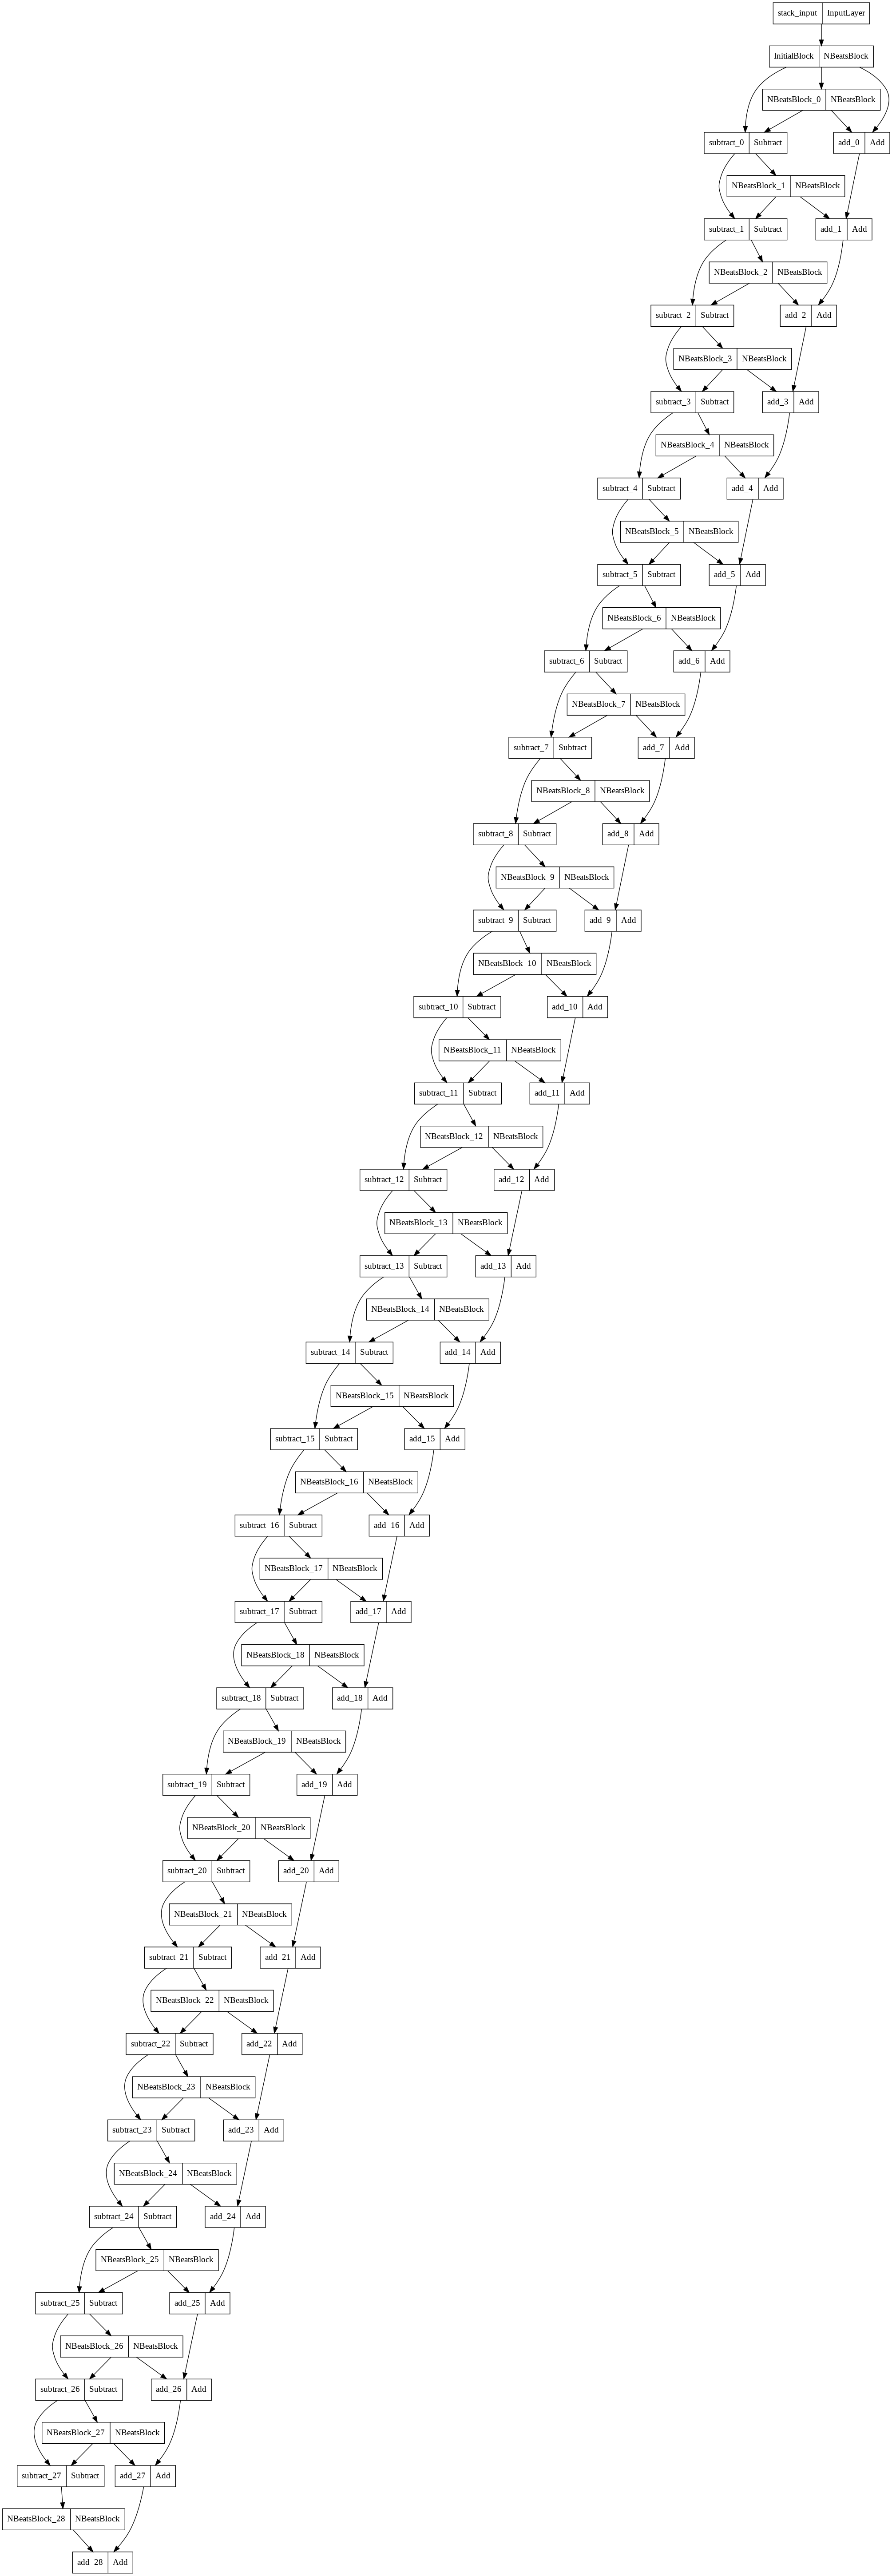

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8 : Creating an ensemble(stacking different models together)

In [ ]:
def get_ensemble_models(horizon = HORIZON,
                        train_data = train_dataset,
                        test_data = test_dataset,
                        num_iter = 10,
                        num_epochs = 1000,
                        loss_fns = ['mae', 'mse','mape']):
  
  ensemble_models = []

  for i in range(num_iter):
    for loss_function in loss_fns:
      print(f"optimizing model by reducing : {loss_function} for {num_epochs} epochs , model number: {i}")

      model = tf.keras.Sequential([
          layers.Dense(128, kernel_initializer = 'he_normal',activation = 'relu'),
          layers.Dense(128, kernel_initializer ='he_normal', activation = 'relu'),
          layers.Dense(HORIZON)
      ])

      model.compile(loss = loss_function,
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics = ["mae", 'mse'])
      
      model.fit(train_data, 
                epochs = num_epochs,
                verbose = 0,
                validation_data = test_data,
                callbacks =  [tf.keras.callbacks.EarlyStopping(monitor= 'val_loss',
                                                              patience = 100,
                                                              restore_best_weights = True),
                              tf.keras.callbacks.ReduceLROnPlateau(monitor ='val_loss',
                                                                   patience = 100,
                                                                   verbose = 1)])
      ensemble_models.append(model)

    return ensemble_models


In [ ]:
%%time

ensemble_models = get_ensemble_models(num_iter = 5,
                                      num_epochs = 1000)

optimizing model by reducing : mae for 1000 epochs , model number: 0

Epoch 888: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
optimizing model by reducing : mse for 1000 epochs , model number: 0

Epoch 577: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
optimizing model by reducing : mape for 1000 epochs , model number: 0

Epoch 163: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
CPU times: user 54.7 s, sys: 9.83 s, total: 1min 4s
Wall time: 43.5 s


In [ ]:
!nvidia-smi

Wed Oct 12 11:09:18 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    54W / 400W |   2506MiB / 40536MiB |      5%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Make predictionn with our ensemble model

In [ ]:
ensemble_models

In [ ]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []

  for model in ensemble_models:
    preds  = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
%%time

ensemble_preds = make_ensemble_preds(ensemble_models = ensemble_models,
                                     data = test_dataset)

ensemble_preds 

CPU times: user 131 ms, sys: 26.7 ms, total: 158 ms
Wall time: 143 ms


<tf.Tensor: shape=(3, 556), dtype=float32, numpy=
array([[ 8768.23 ,  8779.703,  9035.216, ..., 50424.37 , 49595.402,
        46669.887],
       [ 8774.069,  8754.878,  9050.68 , ..., 49296.387, 48621.066,
        45488.207],
       [ 8759.679,  8731.398,  9099.702, ..., 49510.75 , 47613.773,
        45096.516]], dtype=float32)>

In [ ]:
ensemble_preds

<tf.Tensor: shape=(3, 556), dtype=float32, numpy=
array([[ 8768.23 ,  8779.703,  9035.216, ..., 50424.37 , 49595.402,
        46669.887],
       [ 8774.069,  8754.878,  9050.68 , ..., 49296.387, 48621.066,
        45488.207],
       [ 8759.679,  8731.398,  9099.702, ..., 49510.75 , 47613.773,
        45096.516]], dtype=float32)>

In [ ]:
import numpy as np
ensemble_median = np.median(ensemble_preds, axis = 0)
ensemble_median

array([ 8768.23  ,  8754.878 ,  9050.68  ,  8736.571 ,  8742.5625,
        8675.056 ,  8643.181 ,  8465.943 ,  8449.378 ,  8522.02  ,
        8198.732 ,  8106.228 ,  8025.7783,  7625.751 ,  7271.0376,
        7276.7417,  7081.241 ,  7240.5684,  7095.6807,  7551.0024,
        7369.5825,  7787.096 ,  7566.964 ,  7376.7715,  7339.2964,
        7300.507 ,  7194.517 ,  7393.3286,  7497.6475,  7545.8936,
        7531.7305,  7313.836 ,  7217.291 ,  7174.357 ,  7179.403 ,
        7230.095 ,  7077.365 ,  7102.292 ,  6864.459 ,  6591.1475,
        7410.647 ,  7132.885 ,  7214.1675,  7251.0376,  7242.2417,
        7241.221 ,  7205.405 ,  7210.0713,  7172.058 ,  7197.505 ,
        7312.6406,  7373.3677,  7228.9814,  7156.9824,  7152.5557,
        6946.709 ,  7275.421 ,  7297.341 ,  7363.886 ,  7706.6724,
        8032.7646,  8097.105 ,  7907.378 ,  8111.046 ,  8116.045 ,
        8168.744 ,  8088.906 ,  8755.117 ,  8867.753 ,  8786.647 ,
        8955.571 ,  8946.509 ,  8675.709 ,  8611.993 ,  8690.3

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis = 0)
ensemble_mean 

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8767.327 ,  8755.327 ,  9061.866 ,  8733.848 ,  8734.695 ,
        8696.193 ,  8666.507 ,  8459.04  ,  8447.398 ,  8513.716 ,
        8198.666 ,  8092.3555,  8023.6304,  7615.944 ,  7282.57  ,
        7302.1353,  7081.5312,  7209.8906,  7104.6094,  7553.1714,
        7360.52  ,  7770.699 ,  7562.3047,  7385.272 ,  7325.531 ,
        7306.436 ,  7198.403 ,  7389.0156,  7505.11  ,  7535.957 ,
        7547.063 ,  7317.002 ,  7217.06  ,  7169.7036,  7186.4297,
        7225.443 ,  7077.0854,  7093.7603,  6858.3765,  6576.119 ,
        7418.9595,  7167.4883,  7213.283 ,  7259.4956,  7267.482 ,
        7218.9595,  7204.869 ,  7207.853 ,  7170.697 ,  7202.8774,
        7302.6797,  7381.1597,  7237.854 ,  7156.072 ,  7152.1255,
        6943.8696,  7280.207 ,  7332.473 ,  7367.0015,  7699.2466,
        8033.2305,  8107.0317,  7887.9336,  8107.793 ,  8102.8364,
        8164.5063,  8091.5044,  8755.749 ,  8845.864 ,  8777.481 ,
        8976.6

In [ ]:
ensemble_results = evaluate_preds(y_true = y_test,
                                  y_pred = ensemble_mean)

ensemble_results

{'mae': 570.18,
 'mse': 1162139.6,
 'rmse': 23.87844,
 'mape': 2.6221237,
 'mase': 1.0016483}

In [ ]:
ensemble_results = evaluate_preds(y_true = y_test,
                                  y_pred = ensemble_median)

ensemble_results

{'mae': 571.55725,
 'mse': 1159602.2,
 'rmse': 23.907263,
 'mape': 2.6353521,
 'mase': 1.0040678}

In [ ]:
model_1_results

{'mae': 569.8619,
 'mse': 1179377.5,
 'rmse': 23.871778,
 'mape': 2.552693,
 'mase': 1.0010895}

## plotting the prediction interval of our ensemble

In [ ]:
def get_upper_lower(preds):
  std = tf.math.reduce_std(preds, axis = 0)
  interval = std * 1.96
  preds_mean = tf.reduce_mean(preds, axis =0)
  lower, upper  = preds_mean - interval , preds_mean + interval

  return lower, upper 

In [ ]:
lower, upper  = get_upper_lower(ensemble_preds)

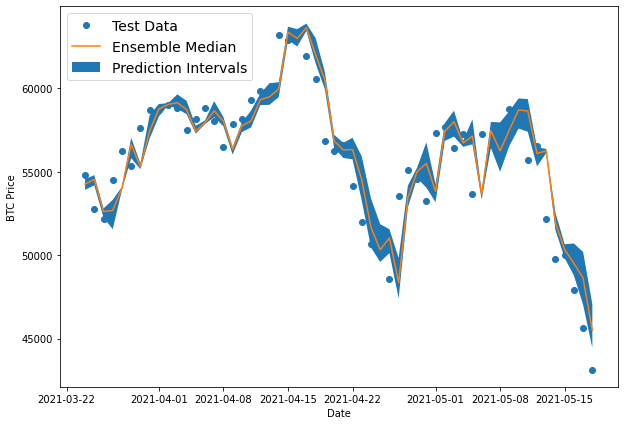

In [ ]:
ensemble_median = np.median(ensemble_preds, axis = 0)

offset = 500
plt.figure(figsize= ( 10,7))
plt.plot(X_test.index[offset:],y_test[offset:],'o',label = 'Test Data')
plt.plot(X_test.index[offset:],ensemble_median[offset:],'-', label = 'Ensemble Median')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label = 'Prediction Intervals')
plt.legend(loc = 'upper left', fontsize = 14)


## model 9 : Train a model on fulll historical data to predict the future

In [ ]:
bitcoin_prices_windowed.head()

,price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
X_all = bitcoin_prices_windowed.dropna().drop(['price','block_reward'],axis =1).to_numpy()
y_all = bitcoin_prices_windowed.dropna()['price'].to_numpy()

In [ ]:
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
],name = "model_9_future_model" )

model_9.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam())

model_9.fit(dataset_all,
            epochs =100,
            verbose =0)

## Make prediction in the future

In [ ]:
INTO_FUTURE = 14


In [ ]:
def make_future_forecasts(values,model, into_future, window_size = WINDOW_SIZE) -> list:

  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  for _ in  range(INTO_FUTURE):
    future_pred = model.predict(tf.expand_dims(last_window, axis =0))
    print(f"predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()} \n")

    future_forecast.append(tf.squeeze(future_pred).numpy())
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  return future_forecast

In [ ]:
future_forecast = make_future_forecasts(values = y_all,
                                        model= model_9,
                                        into_future = INTO_FUTURE,
                                        window_size = WINDOW_SIZE)

predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55734.99609375 

predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55734.99609375] -> Prediction: 50957.27734375 

predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55734.99609375 50957.27734375] -> Prediction: 48697.07421875 

predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55734.99609375 50957.27734375 48697.07421875] -> Prediction: 48256.41015625 

predicting on:
 [47885.62525472 45604.61575361 43144.47129086 55734.99609375
 50957.27734375 48697.07421875 48256.41015625] -> Prediction: 47772.62109375 

predicting on:
 [45604.61575361 43144.47129086 55734.99609375 50957.27734375
 48697.07421875 48256.41015625 47772.62109375] -> Prediction: 46839.58984375 

predicting on:
 [43144.47129086 55734.99609375 50957.27734375 48

## plot_future_forecasts

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  start_date = start_date + np.timedelta64(offset,'D')
  end_date =  start_date + np.timedelta64(into_future, 'D')
  return np.arange(start_date, end_date, dtype = "datetime64[D]")

In [ ]:
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
next_time_steps = get_future_dates(start_date = last_timestep,
                                   into_future = INTO_FUTURE)

In [ ]:
next_time_steps = np.insert(next_time_steps,0,last_timestep)
future_forecast = np.insert(future_forecast,0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55734.996, 50957.277, 48697.074, 48256.41 , 47772.62 ,
        46839.59 , 48326.76 , 53959.37 , 49704.81 , 47791.66 , 48206.715,
        48674.418, 48641.156, 50324.37 ], dtype=float32))

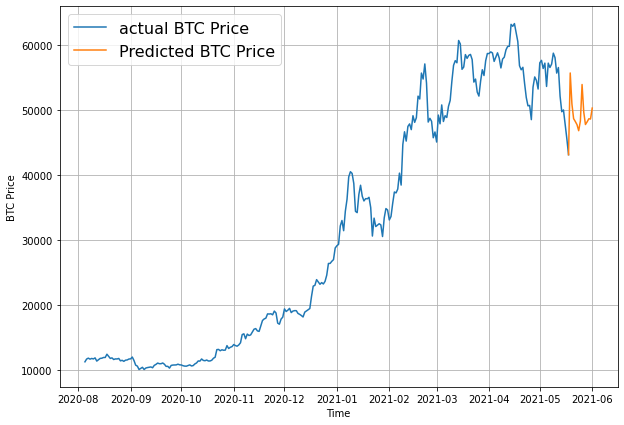

In [ ]:
plt.figure(figsize = (10,7))
plot_time_series(bitcoin_prices.index,btc_price, start= 2500, format = '-', label = "actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format = '-', label = "Predicted BTC Price")

## model 10: why forecasting is BS(the turkey problem)

In [148]:
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] /100

In [149]:
btc_timesteps_turkey = np.array(bitcoin_prices.index)

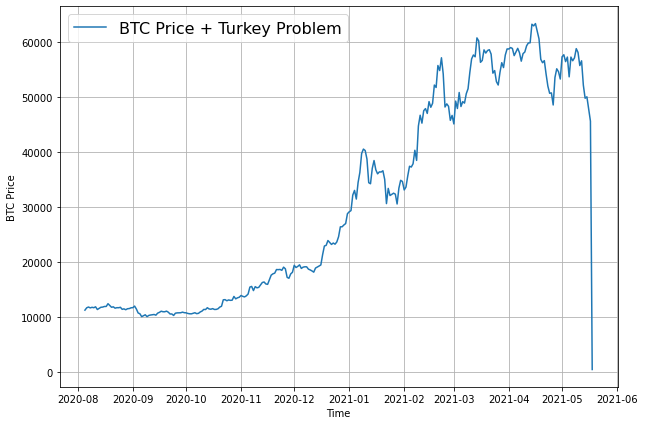

In [150]:
plt.figure(figsize = (10,7))
plot_time_series(timesteps = btc_timesteps_turkey,
                 values = btc_price_turkey,
                 format = "-",
                 label  ="BTC Price + Turkey Problem",
                 start = 2500)

In [151]:
HORIZON = 1
WINDOW_SIZE =7

In [152]:
full_windows ,full_labels = make_windows(np.array(btc_price_turkey), window_size = WINDOW_SIZE)

X_train, X_test, y_train,y_test = make_train_test_split(full_windows , full_labels)

In [154]:
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"
turkey_model.compile(loss = "mae",
                     optimizer = tf.keras.optimizers.Adam())

turkey_model.fit(X_train,y_train,
                 epochs = 100,
                 verbose = 0,
                 batch_size = 128,
                 validation_data = (X_test,y_test),
                 callbacks = [create_model_checkpoint(turkey_model.name)])

In [155]:
turkey_model.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 692.4902


692.4901733398438

In [156]:
turkey_model = tf.keras.models.load_model("model_experiment/model_10_turkey_model")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 649.6540


649.6539916992188

In [157]:
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8861.431, 8764.706, 9033.131, 8763.97 , 8721.97 , 8759.529,
       8702.188, 8479.771, 8483.802, 8523.832], dtype=float32)>

In [159]:
turkey_results = evaluate_preds(y_true = y_test,
                                y_pred =turkey_preds)

turkey_results

{'mae': 17136.365,
 'mse': 614910300.0,
 'rmse': 127.45155,
 'mape': 121.45441,
 'mase': 26.51858}

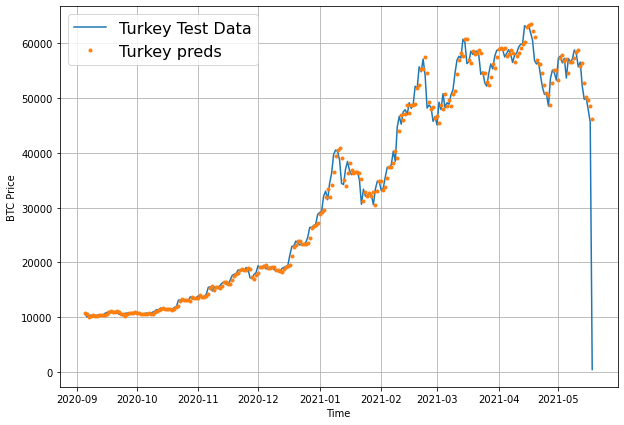

In [161]:
plt.figure(figsize = (10,7))
offset = 300
plot_time_series(timesteps = btc_timesteps_turkey[-len(X_test):],
                 values = btc_price_turkey[-len(y_test):],
                 format = "-",
                 label= "Turkey Test Data", start = offset)

plot_time_series(timesteps = btc_timesteps_turkey[-len(X_test):],
                 values = turkey_preds,
                 label = "Turkey preds",
                 start = offset)

## Compare models

In [162]:
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              'model_2_dense_w30_h1': model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_Conv1d":model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate":model_6_results,
                              "model_7_NBEATS": model_7_results,
                              "model_8_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T

model_results

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,23.832336,2.516525,0.999570
model_1_dense_w7_h1,569.861877,1.179378e+06,23.871778,2.552693,1.001089
model_2_dense_w30_h1,610.206055,1.287168e+06,24.702349,2.747798,1.066646
model_3_dense_w30_h7,1230.303223,5.372156e+06,29.595303,5.525269,2.189256
model_4_Conv1d,570.701477,1.179022e+06,23.889359,2.568667,1.002564
model_5_LSTM,595.624268,1.270350e+06,24.405415,2.676557,1.046347
model_6_multivariate,568.540527,1.170116e+06,23.844088,2.548675,0.998768
model_7_NBEATS,572.826233,1.171204e+06,23.933788,2.579560,1.006297
model_8_ensemble,571.557251,1.159602e+06,23.907263,2.635352,1.004068
model_10_turkey,17136.365234,6.149103e+08,127.451553,121.454407,26.518579


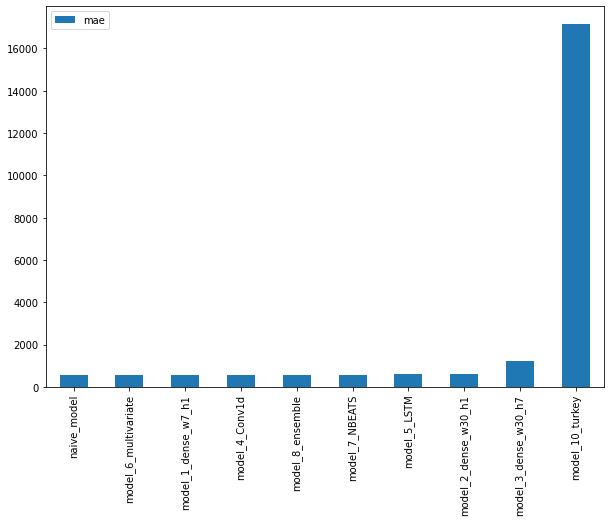

In [163]:
model_results[["mae"]].sort_values(by= 'mae').plot(figsize = (10,7), kind = 'bar');